In [1]:
from pop4sim import fetch_wpp, group_5yr, Demography, ModelAll, reform_pars_all
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

In [2]:
def draw_gof(sol, demo):
    years = demo.Years
    nd = np.array([demo(t)['N'] for t in demo.Years])
    ns = sol.sol(years).reshape(-1)
    errors = (ns / nd - 1) ** 2
    
    fig, axes = plt.subplots(1, 2)
    axes[0].scatter(x=years, y=nd)
    axes[0].plot(years, ns)
    axes[0].set_title('Population')

    axes[1].scatter(x=years, y=errors)
    axes[1].hlines(y=1e-5, xmin=years[0], xmax=years[-1])
    axes[1].hlines(y=-1e-5, xmin=years[0], xmax=years[-1])
    axes[1].set_title('Errors')

    fig.tight_layout()
    
    return fig, axes, errors

In [3]:
ext = fetch_wpp(loc='IN', year0=2000, year1=2010)

Fetch population size
Fetch deaths
Fetch birth rate
Fetch sex ratio at birth


## Aggregage population

In [4]:
demo, _ = reform_pars_all(ext, mig=False)
model = ModelAll(demo)
t_span = demo.YearSpan
y0 = model.get_y0(t_span[0])
sol = solve_ivp(model, y0=y0.reshape(-1), t_span=demo.YearSpan, dense_output=True)

1.5512792893231041e-06


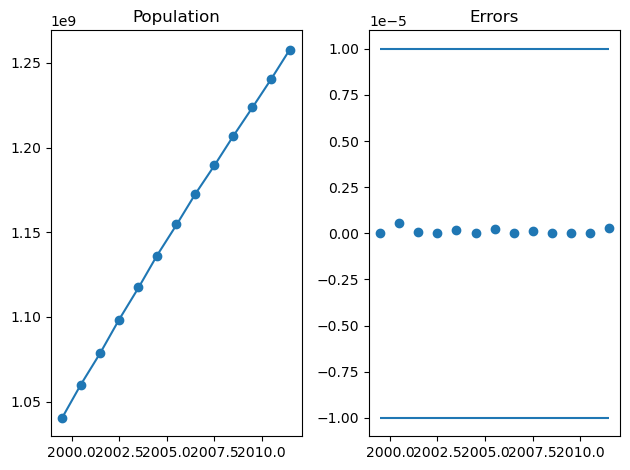

In [5]:
fig, axes, errors = draw_gof(sol, demo)
print(errors.sum())

In [6]:
demo, _ = reform_pars_all(ext, mig=True, opt_mig=False)
model = ModelAll(demo)
t_span = demo.YearSpan
y0 = model.get_y0(t_span[0])
sol = solve_ivp(model, y0=y0.reshape(-1), t_span=demo.YearSpan, dense_output=True)

1.8937224527250177e-07


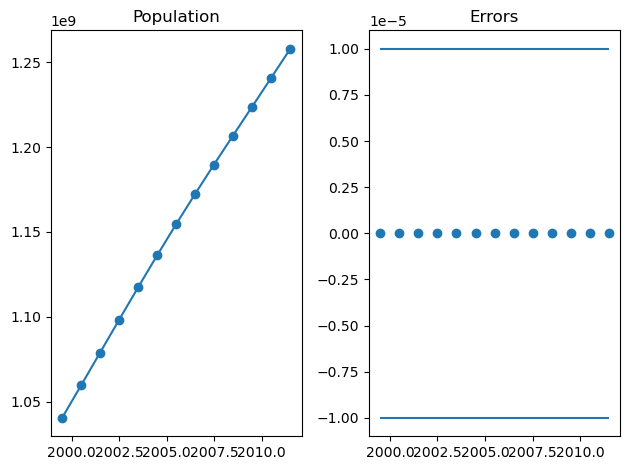

In [7]:
fig, axes, errors = draw_gof(sol, demo)
print(errors.sum())

In [8]:
demo, _ = reform_pars_all(ext, mig=True, opt_mig=True)
model = ModelAll(demo)
t_span = demo.YearSpan
y0 = model.get_y0(t_span[0])
sol = solve_ivp(model, y0=y0.reshape(-1), t_span=demo.YearSpan, dense_output=True)

 33%|███▎      | 4/12 [00:00<00:00, 34.90it/s]

1 -0.0002394894957559457 1.5848984875525526e-15 2.1616075435651502e-09
2 -7.340888195427173e-05 2.270946260641066e-15 7.872064176454605e-09
3 -0.00042546605052393366 5.699604192269494e-17 6.703134805567067e-09
4 2.5735822186374677e-05 1.2081166060168944e-15 1.2412521040920087e-08
5 -0.00033747616018221164 5.1799067657467144e-15 3.149517540139779e-10
6 -0.00035112510704692545 6.269074414254873e-17 1.015625526894111e-09
7 -0.003701853261672028 7.17975781810878e-15 1.8573623438676066e-07


 67%|██████▋   | 8/12 [00:00<00:00, 29.37it/s]

8 0.04304412692451129 2.8880302956124845e-05 3.824212025253615e-05
9 -0.057168775999360065 7.645377912375256e-14 0.001181177994169525
10 0.1615368510218923 4.456539792695517e-05 0.0030224096201468915


100%|██████████| 12/12 [00:00<00:00, 18.16it/s]

11 -0.1973540393059463 0.0021720052021262505 0.017938105253793017
12 0.10934325960171082 1.8417380989450698e-13 0.0026564975279493885


0.006366480190378141


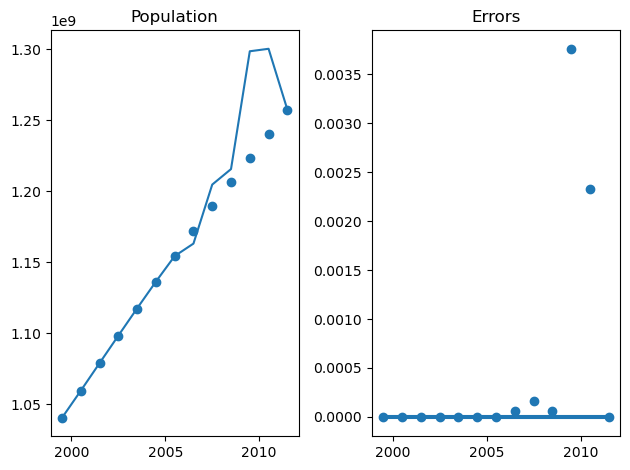

In [9]:
fig, axes, errors = draw_gof(sol, demo)
print(errors.sum())